<h3>Objetivo: Desenvolver uma análise exploratória dos dados sobre o índice de precipitação de chuvas e quantidade de casos de dengue.</h3>

<p>Atenção</p> 

<p>1. Todos os dados apresentados são fictícios e não representam informações do mundo real.</p> 

<p>2. A proposta inicial do projeto era a construção de um pipeline de dados com a biblioteca Apache Beam. Como complemento, foi apresentada a proposta de fazer uma análise exploratória dos dados reforçando o aprendizado das bibliotecas Pandas (para tratamento) e Matplotlib (para visualização) dos dados.</p>

<p>Referências utilizadas para desenvolvimento da análise</p>


<a style="color:lightgrey" href="https://pandas.pydata.org/docs/reference/general_functions.html">1. Tratando dados com pandas</a>

<a style="color:lightgrey" href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html">2. Visualizando dados com matplolib</a>

<p>Documentação dos atributos, datatypes, descrição e exemplo dos dados presentes na base de dados</p>

<table>
    <tr>
        <td>atributo</td>
        <td>tipo de dado</td>
        <td>descrição</td>
        <td>exemplo</td>
    </tr>
    <tr>
        <td>uf</td>
        <td>string</td>
        <td>a unidade federativa</td>
        <td>SP</td>
    </tr>
    <tr>
        <td>ano</td>
        <td>int</td>
        <td>o ano de coleta dos dados mm_chuva e casos_dengue</td>
        <td>2015</td>
    </tr>
    <tr>
        <td>mes</td>
        <td>int</td>
        <td>o mês de coleta dos dados mm_chuva e casos_dengue</td>
        <td>1</td>
    </tr>
    <tr>
        <td>mm_chuva</td>
        <td>float</td>
        <td>o índice de precipitação de chuvas em milímetros</td>
        <td>4465.0</td>
    </tr>
    <tr>
        <td>casos_dengue</td>
        <td>float</td>
        <td>o número de casos de dengue</td>
        <td>772.0</td>
    </tr>
</table>

<p>Importando as bibliotecas para análise, tratamento e visualização de dados</p>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p>Apresentando uma amostra da base de dados</p>

In [92]:
data = pd.read_csv("resultado_csv-00000-of-00001.csv", delimiter = ";")
data.head(5)

,uf,ano,mes,mm_chuva,casos_dengue
0,SP,2015,1,4465.0,772.0
1,SP,2015,2,6595.0,3086.0
2,SP,2015,3,6210.6,8824.0
3,SP,2015,4,1862.0,9932.0
4,SP,2015,5,2756.6,8919.0


<p>Somando as precipitações e casos de dengue e agrupando os dados por UF e ano</p>

In [93]:
agrupa_uf_ano = data.groupby(['uf','ano'])[['mm_chuva','casos_dengue']].sum().round(1)
agrupa_uf_ano

mm_chuva  casos_dengue
uf ano                         
CE 2015    9261.4       60171.0
   2016    6404.4       65197.0
   2017    9304.2       66236.0
   2018    9575.4       12841.0
   2019    9708.0       30711.0
ES 2015    6907.8       44808.0
   2016    8807.0       54729.0
   2017   10846.6       12344.0
   2018   16790.0       16890.0
   2019   13468.2       80593.0
MG 2015   53407.4       21781.0
   2016   68198.0       78366.0
   2017   59530.8        3484.0
   2018   82716.0        1524.0
   2019   67792.8       26815.0
PR 2015   35853.8       96929.0
   2016   33012.8      210436.0
   2017   41260.6       27893.0
   2018   32481.6       19070.0
   2019   33106.8      113183.0
RJ 2015   17238.8       71879.0
   2016   25846.2       83073.0
   2017   23755.0       12853.0
   2018   35701.6       18109.0
   2019   39587.8       28666.0
RS 2015   67862.2         730.0
   2016   57877.0          18.0
   2017   73645.0         263.0
   2018   67324.4           7.0
   2019   69619.4        1355.0
SP 2015   46527.4       38795.0
   2016   40538.2       28423.0
   2017   49534.4        3738.0
   2018   49581.4        5244.0
   2019   50475.6       80427.0

<p>Calculando a média das precipitações e a média dos casos de dengue por UF e ano</p>

In [94]:
agrupa_uf = data.groupby(['uf'])[['mm_chuva','casos_dengue']].mean().round(1)
agrupa_uf

,mm_chuva,casos_dengue
uf,,
CE,737.6,3919.3
ES,947.0,3489.4
MG,5527.4,2199.5
PR,2928.6,7791.8
RJ,2368.8,3576.3
RS,5605.5,39.6
SP,3944.3,2610.4


<p>Visualizando a média das precipitações por UF</p>

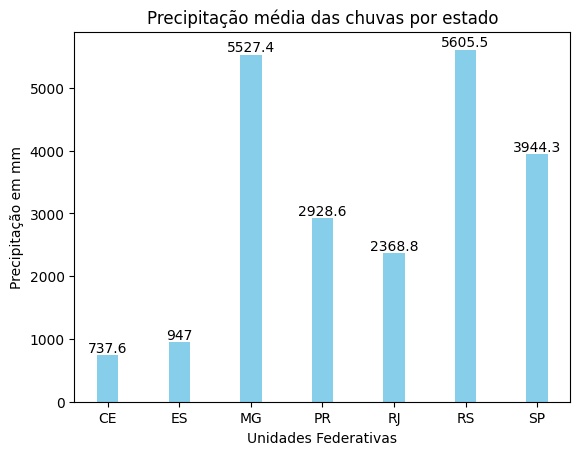

In [95]:
uf = list(agrupa_uf.index)
mm_chuva = list(agrupa_uf['mm_chuva'])

bar_container = plt.bar(x = uf, height = mm_chuva, width = 0.3, color = 'skyblue')
plt.bar_label(bar_container)
plt.xlabel("Unidades Federativas")
plt.ylabel("Precipitação em mm")
plt.title("Precipitação média das chuvas por estado")
plt.show()

<p>Visualizando a média dos casos de dengue por UF</p>

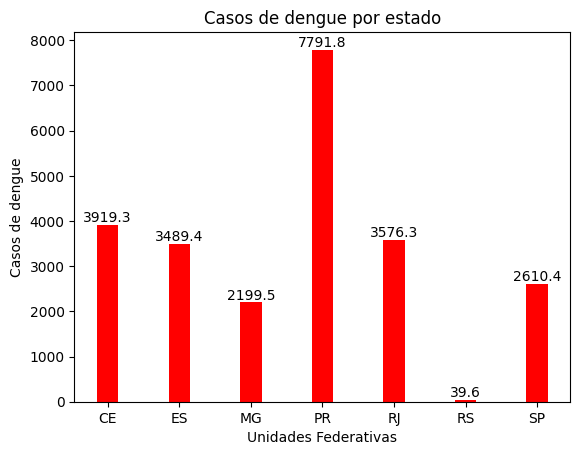

In [96]:
uf = list(agrupa_uf.index)
casos_dengue = list(agrupa_uf['casos_dengue'])

bar_container = plt.bar(x = uf, height = casos_dengue, width = 0.3, color = 'red')
plt.bar_label(bar_container)
plt.xlabel("Unidades Federativas")
plt.ylabel("Casos de dengue")
plt.title("Casos de dengue por estado")
plt.show()

<p>Provocação 01 - Como podemos visualizar no gráfico "Precipitação média das chuvas por estado", o estado do Rio Grande do Sul possui a maior média das precipitações, entretanto, quando visualizamos o gráfico "Casos de dengue por estado", o mesmo estado possui a menor média de casos de dengue. Sabendo que uma das principais formas de proliferação dos casos de dengue é através da água parada, quais fatores poderiam contribuir para uma média de casos de dengue tão baixa em um estado com a maior média de precipitações?</p>

<p>Separando as informações de cada UF para analisá-las separadamente</p>

In [97]:
dados_CE = data.query("uf == 'CE'")
dados_ES = data.query("uf == 'ES'")
dados_MG = data.query("uf == 'MG'")
dados_PR = data.query("uf == 'PR'")
dados_RJ = data.query("uf == 'RJ'")
dados_RS = data.query("uf == 'RS'")
dados_SP = data.query("uf == 'SP'")

<p>Desenvolvendo uma função para retornar: UF e números (mínimo, máximo e zerados) dos casos de dengue</p>

In [111]:
def uf_min_max_zerados_casos_dengue(dataframe):
    uf = str(list(dataframe['uf'])[0])
    num_min_casos = float(dataframe['casos_dengue'].min())
    num_max_casos = float(dataframe['casos_dengue'].max())
    num_casos_zerados = float(dataframe.query("casos_dengue == 0.0")['casos_dengue'].count())
    return f"UF: {uf} | Menor volume de casos: {num_min_casos} | Maior volume de casos: {num_max_casos} | Volume de casos zerados: {num_casos_zerados}"

infos_CE = uf_min_max_zerados_casos_dengue(dados_CE)
infos_ES = uf_min_max_zerados_casos_dengue(dados_ES)
infos_MG = uf_min_max_zerados_casos_dengue(dados_MG)
infos_PR = uf_min_max_zerados_casos_dengue(dados_PR)
infos_RJ = uf_min_max_zerados_casos_dengue(dados_RJ)
infos_RS = uf_min_max_zerados_casos_dengue(dados_RS)
infos_SP = uf_min_max_zerados_casos_dengue(dados_SP)

<p>Resposta a Provocação 01 - Após processar a função "uf_min_max_zerados_casos_dengue", podemos observar alguns comportamentos dos dados: o Rio Grande do Sul é o estado que mais possui dados zerados, ou seja, meses sem registrar informações sobre os casos de dengue. Além disso, quando comparamos a menor quantidade de registros de casos de dengue entre os estados, apenas Minas Gerais possui o volume igual ao Rio Grande do Sul, entretanto, o valor 0.0 é apresentado apenas uma vez para Minas Gerais, em contramão é apresentado 24 vezes para o Rio Grande do Sul.</p>

In [112]:
print(infos_CE,"\t")
print(infos_ES,"\t")
print(infos_MG,"\t")
print(infos_PR,"\t")
print(infos_RJ,"\t")
print(infos_RS,"\t")
print(infos_SP,"\t")

UF: CE | Menor volume de casos: 334.0 | Maior volume de casos: 22133.0 | Volume de casos zerados: 0.0 	
UF: ES | Menor volume de casos: 432.0 | Maior volume de casos: 17690.0 | Volume de casos zerados: 0.0 	
UF: MG | Menor volume de casos: 0.0 | Maior volume de casos: 23590.0 | Volume de casos zerados: 1.0 	
UF: PR | Menor volume de casos: 564.0 | Maior volume de casos: 56305.0 | Volume de casos zerados: 0.0 	
UF: RJ | Menor volume de casos: 352.0 | Maior volume de casos: 22100.0 | Volume de casos zerados: 0.0 	
UF: RS | Menor volume de casos: 0.0 | Maior volume de casos: 436.0 | Volume de casos zerados: 24.0 	
UF: SP | Menor volume de casos: 103.0 | Maior volume de casos: 25134.0 | Volume de casos zerados: 0.0 	
